In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

df = pd.read_csv("survey_results_public_file2.csv")

In [15]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


# Data Cleaning

In [16]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [17]:
df.info

<bound method DataFrame.info of                             Country  \
0                               NaN   
1          United States of America   
2          United States of America   
3          United States of America   
4                       Philippines   
...                             ...   
89179                        Brazil   
89180                       Romania   
89181                        Israel   
89182                   Switzerland   
89183  Iran, Islamic Republic of...   

                                                 EdLevel YearsCodePro  \
0                                                    NaN          NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)            9   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)           23   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)            7   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)            4   
...                                                  ...     

In [18]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [19]:
df['Country'].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

In [20]:
# Testing how maps works

# c_map = {}
# c_map[df.Country.value_counts().index[0]] = 'Other'
# # c_map[df.Country.value_counts().index[1]] = 'Other'
# # c_map[df.Country.value_counts().index[2]] = 'Other'
# # c_map

# # c_map
# df['Country'].map(c_map)

In [21]:
def shorten_categories(categories, cutoff):
    """
    discard the data whose category has fewer than <cutoff> number of data
    """
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [22]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

C:\Users\aaron\AppData\Local\Temp\ipykernel_8740\1824056870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].map(country_map)


Country
United States of America                                11846
Other                                                    8307
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531


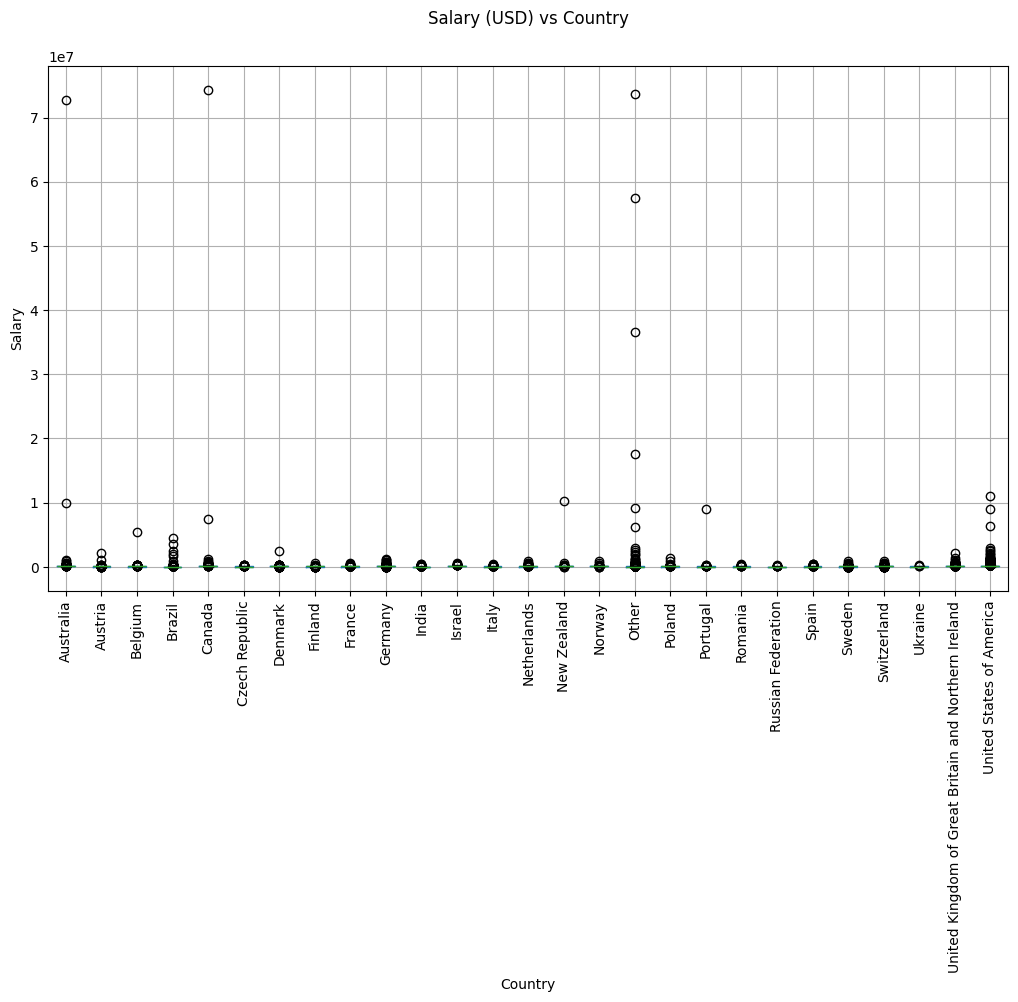

In [23]:
# inspect the salary range

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)

plt.show()

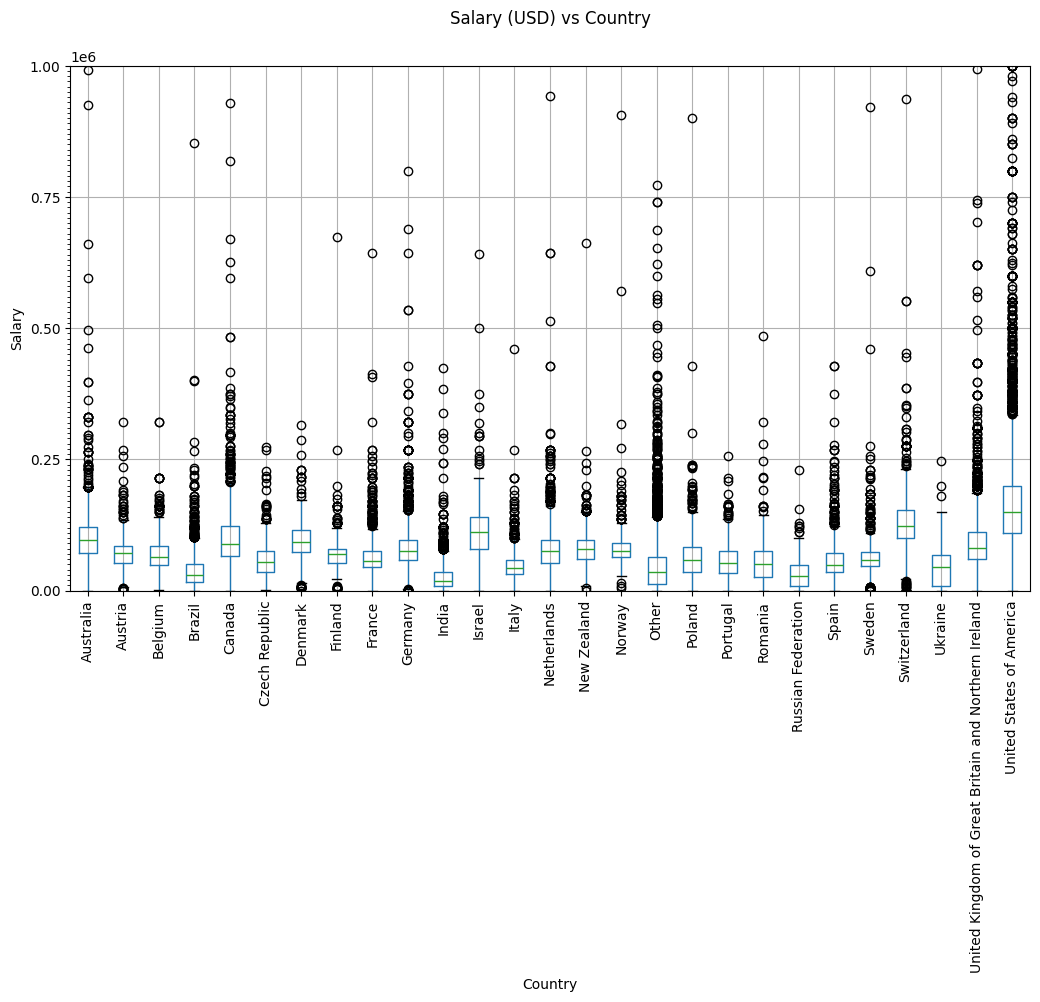

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)

ax.yaxis.set_major_locator(MultipleLocator(250000))
ax.yaxis.set_minor_locator(AutoMinorLocator(25))
plt.ylim(0, 1000000)
plt.show()

In [25]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']

In [26]:
# cleaning experience data: YearsCodePro
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '1', '38', '33', '29', '22', '31', '34', '37', '42',
       'More than 50 years', '36', '39', '35', '41', '32', '44', '48',
       '45', '46', '47', '49'], dtype=object)

In [27]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50.0
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [28]:
df['YearsCodePro'].unique()

array([23. ,  7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. , 16. , 28. , 30. , 24. , 40. ,  4. , 25. , 12. ,
       20. , 11. ,  8. , 18. , 50. , 27. , 17. , 43. , 26. ,  1. , 38. ,
       33. , 29. , 22. , 31. , 34. , 37. , 42. , 36. , 39. , 35. , 41. ,
       32. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [29]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [30]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than Bechelors'
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [31]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than Bechelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [32]:
# Model cannot understand string
# convert strings to a unique number

from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [33]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10,  1, 15,
       19, 16,  2,  6, 11, 23,  5, 18, 14])

In [34]:
df['Employment'].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [35]:
# This can be improved into more detailed categories.

def clean_employment(x):
    if 'Employed' in x:
        return 'Employed'
    if 'Independent' in x:
        return 'Independent'
    return 'Other'
df['Employment'] = df['Employment'].apply(clean_employment)

In [36]:
df.Employment.unique()

array(['Employed', 'Independent', 'Other'], dtype=object)

In [37]:
le_employment = LabelEncoder()
df['Employment'] = le_employment.fit_transform(df['Employment'])
df['Employment'].unique()

array([0, 1, 2])

# Model Training
Should split data into training and testing, but use all data for nowfor simplicity

In [38]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)
y_pred = linear_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

$46,960.99


In [40]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)
y_pred = dec_tree_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

# can adjust parameters such as max_depth

$33,154.41


In [41]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
y_pred = random_forest_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

$33,398.75


In [42]:
from sklearn.model_selection import GridSearchCV

# loop over different parameters

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [43]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)

# Note that RandomForest has a random state, so the outcome might not be the best

error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

$35,582.41


In [44]:
X

,Country,EdLevel,YearsCodePro,Employment
2,25,0,23.0,0
3,25,0,7.0,0
5,24,1,21.0,0
6,25,1,3.0,0
7,25,0,3.0,0
...,...,...,...,...
89156,25,0,8.0,0
89158,21,0,8.0,0
89162,3,2,24.0,0
89167,10,0,2.0,0


In [45]:
# country, edlevel, yearscode, employment

X = np.array([['United States of America', 'Master’s degree', 15, 'Independent']])
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X[:, 3] = le_employment.transform(X[:,3])
X = X.astype(float)
X

array([[25.,  2., 15.,  1.]])

# Save the model

In [46]:
import pickle

data = {'model': regressor, 'le_country': le_country, 'le_education': le_education, 'le_employment': le_employment}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [47]:
# get the data back from the file

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']
le_employment = data['le_employment']

In [48]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([63600.])

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 

def shorten_categories(categories, cutoff):
    """
    discard the data whose category has fewer than <cutoff> number of data
    """
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


def clean_experience(x):
    if x == 'More than 50 years':
        return 50.0
    if x == 'Less than 1 year':
        return 0.5
    return float(x)


def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than Bechelors'


def clean_employment(x):
    if 'Employed' in x:
        return 'Employed'
    if 'Independent' in x:
        return 'Independent'
    return 'Other'


def load_data():
    df = pd.read_csv("survey_results_public_file2.csv")
    df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
    df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
    df = df.dropna()

    country_map = shorten_categories(df.Country.value_counts(), 400)
    df['Country'] = df['Country'].map(country_map)

    df = df[df['Salary'] <= 250000]
    df = df[df['Salary'] >= 5000]
    df = df[df['Country'] != 'Other']

    df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
    df['EdLevel'] = df['EdLevel'].apply(clean_education)
    df['Employment'] = df['Employment'].apply(clean_employment)
    
    return df

df = load_data()

In [66]:
df.groupby(['Country']).head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United States of America,Bachelor’s degree,23.0,Employed,250000.0
3,United States of America,Bachelor’s degree,7.0,Employed,156000.0
5,United Kingdom of Great Britain and Northern I...,Less than Bechelors,21.0,Employed,96828.0
6,United States of America,Less than Bechelors,3.0,Employed,135000.0
7,United States of America,Bachelor’s degree,3.0,Employed,80000.0
...,...,...,...,...,...
1557,Romania,Bachelor’s degree,5.0,Employed,57724.0
3249,New Zealand,Bachelor’s degree,15.0,Employed,80127.0
5387,New Zealand,Bachelor’s degree,33.0,Employed,151755.0
5523,New Zealand,Master’s degree,14.0,Employed,82858.0
